## Network Science Lab 1 solution

### Task 1: Barabasi-Albert network

The Barabasi-Albert model for complex networks is based on the idea that networks evolve over time and that new nodes are more likely to link to high-degree nodes. It is (probably) the single-most important model in the field of network science as it reproduces important qualitative features seen in large complex real-world networks.
We will study this model later in the term, and in this task, you will use NetworkX to generate B-A networks and investigate their properties.

1) The B-A model requires two input parameters: the total number of nodes (*N*), and the number of links (*L*)  added between a new node and the existing network upon its introduction. Use the function *nx.barabasi_albert_graph* to generate a B-A graph with *N=500* and *L=4*. Draw your graph (with node_size=6) and zoom into the figure and look around -- do you see any hubs? (Note that the figure will have to open in a separate window for the zoom option to be available)

In [1]:
#Run this cell first
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

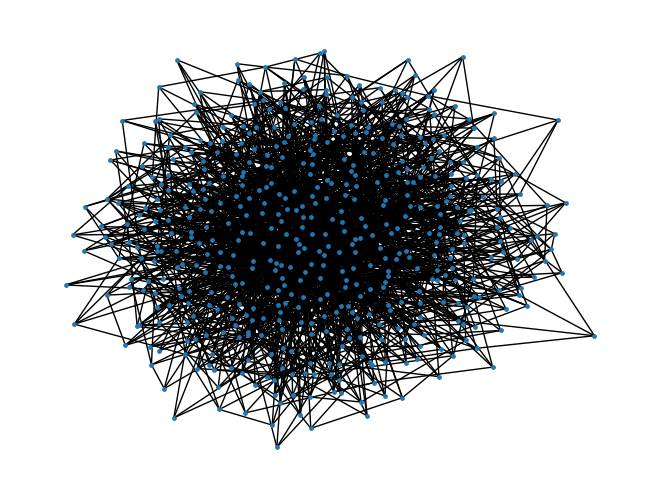

In [2]:
# %matplotlib qt 
#Uncomment the line above to (possibly) allow interactive figure windows to be created outside of notebook
#Add code here
G = nx.barabasi_albert_graph(500,4)
plt.figure(1)
nx.draw(G,node_size=6)

2) Now, generate a B-A graph with *N=5000*, *L=4*, and a $G_{Np}$ graph with *N=5000* and *P=0.002*.
Compute the degree distributions for these graphs and plot them on a log-log plot.

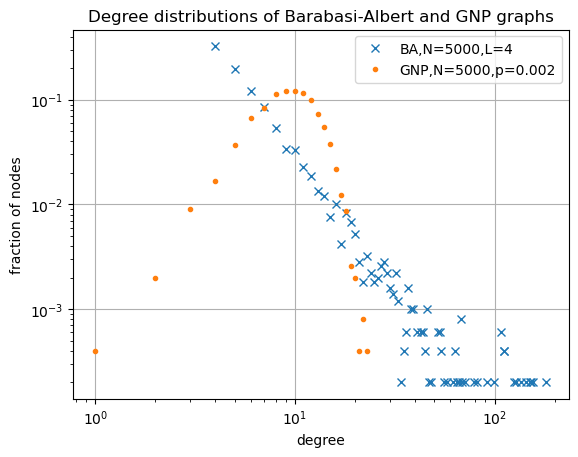

In [3]:
#Add code here
N=5000;L=4;p=0.002
G_BA = nx.barabasi_albert_graph(N,L)
G_GNP = nx.gnp_random_graph(N,p)
h_BA = nx.degree_histogram(G_BA)
h_GNP = nx.degree_histogram(G_GNP)
plt.figure(2)
plt.loglog(np.array(h_BA)/N,'x',label='BA,N=5000,L=4')
plt.loglog(np.array(h_GNP)/N,'.',label='GNP,N=5000,p=0.002')
plt.xlabel('degree')
plt.ylabel('fraction of nodes')
plt.title('Degree distributions of Barabasi-Albert and GNP graphs')
plt.legend()
plt.grid()

3) Compute and compare the average clustering coefficient for the $G_{Np}$ and B-A graphs.

In [4]:
#Add code here
C_BA = nx.average_clustering(G_BA)
C_GNP = nx.average_clustering(G_GNP)
print("Average clustering results: C_BA=%f, C_GNP=%f" %(C_BA,C_GNP))

Average clustering results: C_BA=0.009305, C_GNP=0.001960


### Task 2: Adjacency matrices and Numpy

1. An $N$-node star graph has $N-1$ nodes with degree $1$ and $1$ node with degree $N-1$. Use Numpy (and not NetworkX) to generate $\mathbf{\textrm{A}}_1$, the adjacency matrix for this graph. Number the nodes from $0$ to $N-1$ with node $0$ corresponding to the central high-degree node. You should avoid using loops for this task if you can. An example with $N=8$:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Star_network_7.svg/180px-Star_network_7.svg.png">

In [5]:
N=6
#Add code here (code should work for any sensible N)
#A1=?
#A1[i,j] = 1 if either i or j = 0; otherwise A1[i,j] = 0
A1 = np.zeros((N,N))
A1[0,1:] = 1 
A1[1:,0] = 1 

2. Now consider a *closed* star graph where a "ring" of links is placed around an ordinary star graph. Then, the  graph will have $1$ node with degree $N-1$ and $N-1$ nodes with degree $3$. Use Numpy to create $\mathbf{\textrm{A}}_2$, the adjacency matrix for this graph. The function *np.diag* may be helpful.

In [6]:
N=6
#Add code here (code should work for any sensible N)
#We use np.diag  to place ones above and below the main diagonal of the matrix:
d = np.ones(N-1)
A2 = np.diag(d,k=1) + np.diag(d,k=-1)

#Add the links to the central node
A2[0,2:] = 1
A2[2:,0] = 1

#Add link between nodes 1 and N-1
A2[1,-1] = 1
A2[-1,1] = 1

3. Verify that $\rm (\mathbf{A}_2+\mathbf{I})(\mathbf{A}_2+\mathbf{I})^{-1} = \mathbf{I}$

In [7]:
I = np.eye(N)
A2I = A2+I
A2Iinv = np.linalg.inv(A2I)
Check = A2I.dot(A2Iinv)-I
print("Check=",Check)

Check= [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


4. Finally, use NetworkX to convert $\mathbf{\textrm{A}}_2$ into a NetworkX graph, and then display the graph 

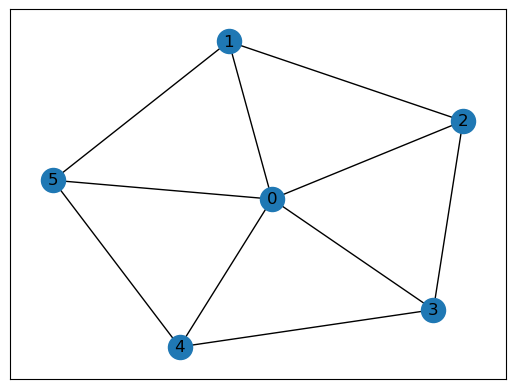

In [8]:
G = nx.from_numpy_array(A2)
plt.figure(3)
nx.draw_networkx(G,with_labels=True)